In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#plt.plot([1,2,3],[5,5,6])
#plt.show()

In [6]:
# PIE data import
PIE_datapath = '/mnt/c/Users/isaac/Desktop/CSE447/final_project/DataMiningProject/data/1_PIE_32x32/'
PIE_test_filenames = ['StTestFile'+str(i)+'.txt' for i in range(1,11)]
PIE_train_filenames = ['StTrainFile'+str(i)+'.txt' for i in range(1,11)]
print(PIE_test_filenames)
print(PIE_train_filenames)

['StTestFile1.txt', 'StTestFile2.txt', 'StTestFile3.txt', 'StTestFile4.txt', 'StTestFile5.txt', 'StTestFile6.txt', 'StTestFile7.txt', 'StTestFile8.txt', 'StTestFile9.txt', 'StTestFile10.txt']
['StTrainFile1.txt', 'StTrainFile2.txt', 'StTrainFile3.txt', 'StTrainFile4.txt', 'StTrainFile5.txt', 'StTrainFile6.txt', 'StTrainFile7.txt', 'StTrainFile8.txt', 'StTrainFile9.txt', 'StTrainFile10.txt']


In [3]:
# Iyer data import
iyer_datapath = '/mnt/c/Users/isaac/Desktop/CSE447/final_project/DataMiningProject/data/6_cho_iyer/'
iyer_filename = 'iyer.txt'

iyer_data = np.genfromtxt(iyer_datapath+iyer_filename)
iyer_X = iyer_data [:,2:]
iyer_y = iyer_data[:,1]
iyer_Xtrain, iyer_Xtest, iyer_ytrain, iyer_ytest = model_selection.train_test_split(iyer_X, iyer_y, train_size=0.80, test_size=0.20, random_state=101)


In [4]:
# Cho data import
cho_datapath = '/mnt/c/Users/isaac/Desktop/CSE447/final_project/DataMiningProject/data/6_cho_iyer/'
cho_filename = 'cho.txt'

cho_data = np.genfromtxt(cho_datapath+cho_filename)
cho_X = cho_data [:,2:]
cho_y = cho_data[:,1]
cho_Xtrain, cho_Xtest, cho_ytrain, cho_ytest = model_selection.train_test_split(cho_X, cho_y, train_size=0.80, test_size=0.20, random_state=101)

In [ ]:
# svm hyperparameters: 
#   gamma degree #slack variabls

In [25]:
PIE_train_filename = PIE_train_filenames[0]
PIE_train_data = np.genfromtxt(PIE_datapath+PIE_train_filename,delimiter=' ')
PIE_Xtrain = PIE_train_data[:,0:1024]
PIE_ytrain = PIE_train_data[:,1024]

PIE_test_filename = PIE_test_filenames[0]
PIE_test_data = np.genfromtxt(PIE_datapath+PIE_test_filename,delimiter=' ')
PIE_Xtest = PIE_test_data[:,0:1024]
PIE_ytest = PIE_test_data[:,1024]

# listofvectors = []
# listofimages = []
# arrayoflabels = np.zeros((train_datain.shape[0]))
# for row in range(train_datain.shape[0]):
#     # print(row)
#     currimage = train_datain[row,0:1024]
#     currlabel = train_datain[row,1024]
#     # currreshaped = np.reshape(currimage,(32,32))
#     # listofimages.append(currreshaped)
#     listofvectors.append(currimage)
#     arrayoflabels[row] = currlabel

In [26]:
PIE_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(PIE_Xtrain, PIE_ytrain)
PIE_poly = svm.SVC(kernel='poly', degree=3, C=1).fit(PIE_Xtrain, PIE_ytrain)

In [40]:
PIE_rbf.get_params()

{'C': 0.1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
PIE_poly_pred = PIE_poly.predict(PIE_Xtest)
PIE_rbf_pred = PIE_rbf.predict(PIE_Xtest)

In [30]:
PIE_poly_accuracy = accuracy_score(PIE_ytest, PIE_poly_pred)
PIE_poly_f1 = f1_score(PIE_ytest, PIE_poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (PIE_poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (PIE_poly_f1*100))

PIE_rbf_accuracy = accuracy_score(PIE_ytest, PIE_rbf_pred)
PIE_rbf_f1 = f1_score(PIE_ytest, PIE_rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (PIE_rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (PIE_rbf_f1*100))

Accuracy (Polynomial Kernel):  27.53
F1 (Polynomial Kernel):  31.60
Accuracy (RBF Kernel):  25.54
F1 (RBF Kernel):  31.02


In [31]:
cho_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(cho_Xtrain, cho_ytrain)
cho_poly = svm.SVC(kernel='poly', degree=3, C=1).fit(cho_Xtrain, cho_ytrain)

In [32]:
cho_poly_pred = cho_poly.predict(cho_Xtest)
cho_rbf_pred = cho_rbf.predict(cho_Xtest)

In [33]:
cho_poly_accuracy = accuracy_score(cho_ytest, cho_poly_pred)
cho_poly_f1 = f1_score(cho_ytest, cho_poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (cho_poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (cho_poly_f1*100))

cho_rbf_accuracy = accuracy_score(cho_ytest, cho_rbf_pred)
cho_rbf_f1 = f1_score(cho_ytest, cho_rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (cho_rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (cho_rbf_f1*100))

Accuracy (Polynomial Kernel):  66.67
F1 (Polynomial Kernel):  64.32
Accuracy (RBF Kernel):  38.46
F1 (RBF Kernel):  24.21


In [34]:
iyer_rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(iyer_Xtrain, iyer_ytrain)
iyer_poly = svm.SVC(kernel='poly', degree=3, C=1).fit(iyer_Xtrain, iyer_ytrain)

In [37]:
iyer_poly_pred = iyer_poly.predict(iyer_Xtest)
iyer_rbf_pred = iyer_rbf.predict(iyer_Xtest)

In [38]:
iyer_poly_accuracy = accuracy_score(iyer_ytest, iyer_poly_pred)
iyer_poly_f1 = f1_score(iyer_ytest, iyer_poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (iyer_poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (iyer_poly_f1*100))

iyer_rbf_accuracy = accuracy_score(iyer_ytest, iyer_rbf_pred)
iyer_rbf_f1 = f1_score(iyer_ytest, iyer_rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (iyer_rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (iyer_rbf_f1*100))

Accuracy (Polynomial Kernel):  56.73
F1 (Polynomial Kernel):  49.95
Accuracy (RBF Kernel):  56.73
F1 (RBF Kernel):  46.24


In [ ]:
# don't use spatial data, keep it as is

In [38]:
uniquelabels, labelcount  = np.unique(arrayoflabels,return_counts=True)
print(uniquelabels)
print(labelcount)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61.]
[17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17 17 16 17 17 17 17 17 17 17 17 17 17
 17 17 17 17 17 17 17 17 17 17 17 17  6]


In [16]:

np.where(arrayoflabels==3)

(array([306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318,
        319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331,
        332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344,
        345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357,
        358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370,
        371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383,
        384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396,
        397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409,
        410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422,
        423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435,
        436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448,
        449, 450, 451, 452, 453, 454, 455, 456, 457, 458]),)

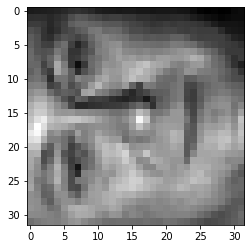

In [36]:
plt.imshow(listofimages[350],cmap='gist_gray')

In [38]:
from sklearn import svm, datasets
import sklearn.model_selection as model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


In [46]:
iris = datasets.load_iris()

In [41]:
X = iris.data[:, :2]
y = iris.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=101)

In [54]:
X_train[0]

array([6.5, 3. ])

In [42]:
rbf = svm.SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

In [43]:
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)

In [44]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  70.00
F1 (Polynomial Kernel):  69.67


In [45]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  76.67
F1 (RBF Kernel):  76.36


In [ ]:
# make a kernel function
# consider the tolerance (via slack variables) of linear non-separable cases
# want to get a w vector and a b vector

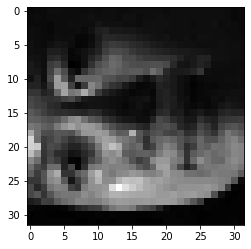

In [13]:
plt.imshow(listofimages[0],cmap='gist_gray')

In [40]:
!pip install tensorflow
# import tensorflow as tf

     |████████████████████████████████| 394.4 MB 276 bytes/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 65 kB 4.7 MB/s 
     |████████████████████████████████| 129 kB 14.5 MB/s 
     |████████████████████████████████| 3.8 MB 17.7 MB/s 
     |████████████████████████████████| 6.0 MB 6.3 MB/s 
     |████████████████████████████████| 462 kB 16.4 MB/s 
     |████████████████████████████████| 1.0 MB 10.0 MB/s 
     |████████████████████████████████| 57 kB 242 kB/s 
     |████████████████████████████████| 14.9 MB 112 kB/s 
     |████████████████████████████████| 142 kB 196 kB/s 
     |████████████████████████████████| 3.9 MB 16.2 MB/s 
     |████████████████████████████████| 781 kB 28.3 MB/s 
     |████████████████████████████████| 97 kB 8.7 MB/s 
     |████████████████████████████████| 155 kB 14.0 MB/s 
     |████████████████████████████████| 77 kB 7.7 MB/s 
     |████████████████████████████████| 147 kB 25.4 MB/s 
  Created wheel for wr